1) import modules and mnist dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import math
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import random as rnd

2)make data by given function and normalize

In [2]:
np.random.seed(0)


def function(x):
    u = 1.6 * np.random.random_sample((500)) - 0.8
    y = (-1) + (2/3) * (np.sin(2 * x * np.pi)) + u
    return y
n1 = 100
n_train1 = 80
n_test1 = 20
x1 = np.arange(0, 2, 0.004)
y1 = function(x1)

indexes = np.random.choice(np.arange(500), 400, replace=False)
indexes = np.sort(indexes, axis = 0)

x_train1 = x1[indexes]
y_train1 = y1[indexes]

x_test1 = np.delete(x1.copy(),indexes)
y_test1 = np.delete(y1.copy(),indexes)

3)show the data

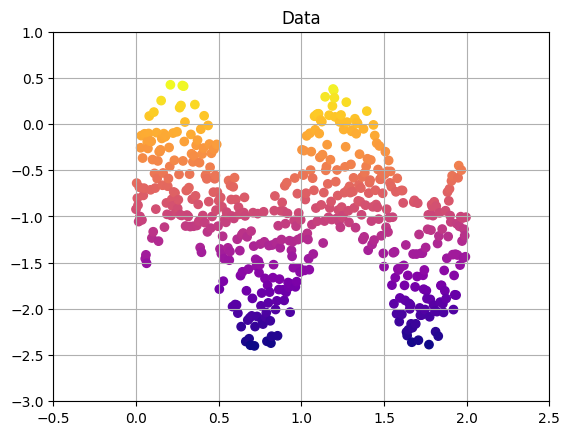

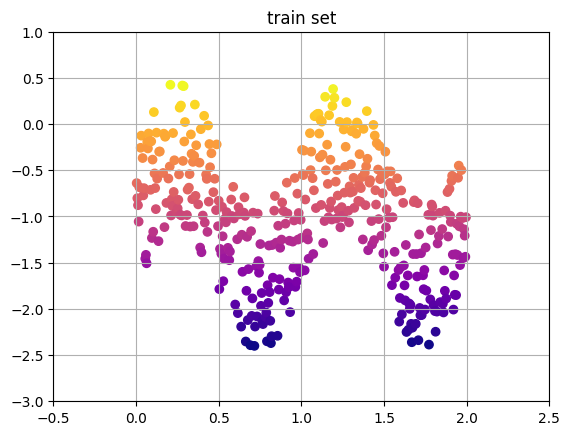

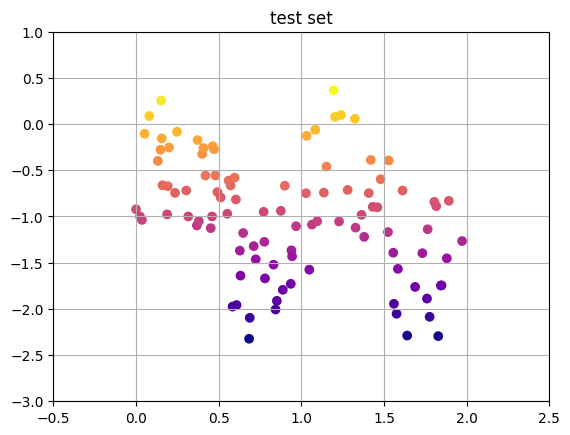

In [3]:
plt.scatter(x1, y1, c=y1, cmap='plasma')
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(-3, 1)
plt.title('Data')
plt.show()

plt.scatter(x_train1, y_train1, c=y_train1, cmap='plasma')
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(-3, 1)
plt.title('train set')
plt.show()

plt.scatter(x_test1, y_test1, c=y_test1, cmap='plasma')
plt.grid()
plt.xlim(-0.5, 2.5)
plt.ylim(-3, 1)
plt.title('test set')
plt.show()

4)K-Means and GMM

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


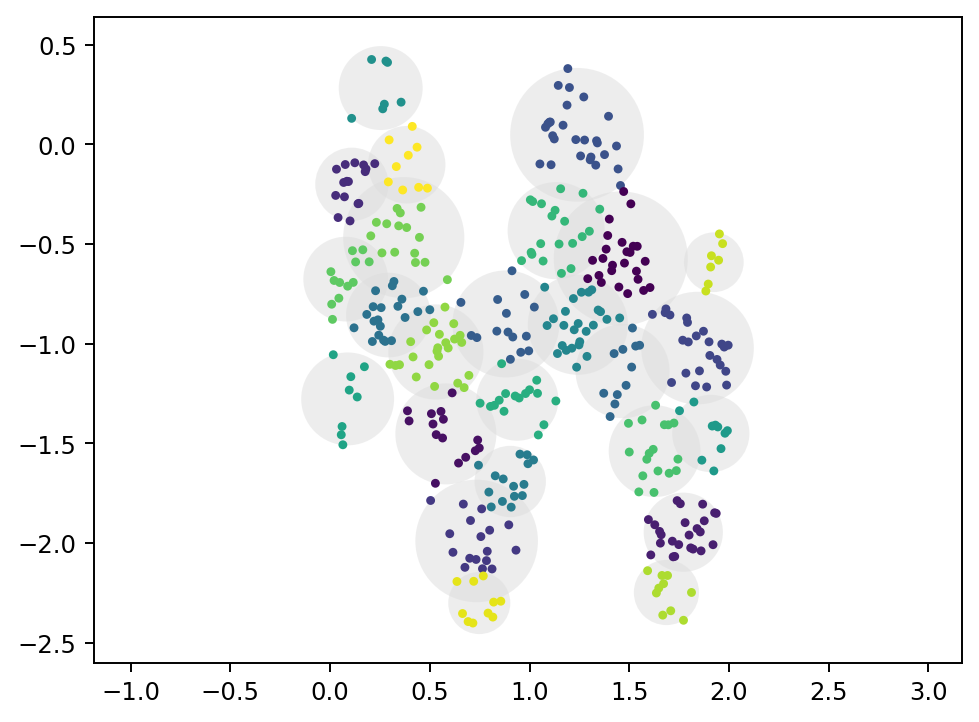

In [23]:
from numpy import random
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = np.array(list(zip(x_train1, y_train1)))

#keams
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, ax=None):
    labels = kmeans.fit_predict(X)
# plot the input data
    plt.figure(dpi=175)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
# plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [
        cdist(X[labels == i], [center]).max()
        for i, center in enumerate(centers)
    ]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(
            c, r, fc='#DDDDDD', lw=3, alpha=0.5, zorder=1
        ))
        

kmeans = KMeans(n_clusters=25, random_state=0).fit(X)
labels_knn = kmeans.predict(X)
plot_kmeans(kmeans, X)

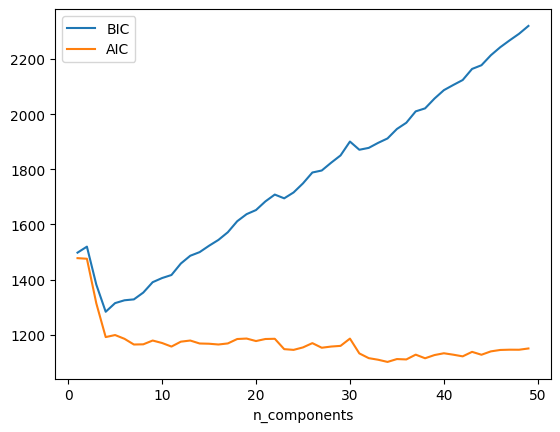

In [5]:
from sklearn.mixture import GaussianMixture

#Gmm
from matplotlib.patches import Ellipse
def plot_gmm(gmm, X, label=True, ax=None):
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        ax = ax or plt.gca()
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(
                position, nsig * width, nsig * height,
                angle, **kwargs
            ))
    
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2) 
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
    
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

n_components = np.arange(1, 50)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27536\678250089.py:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(


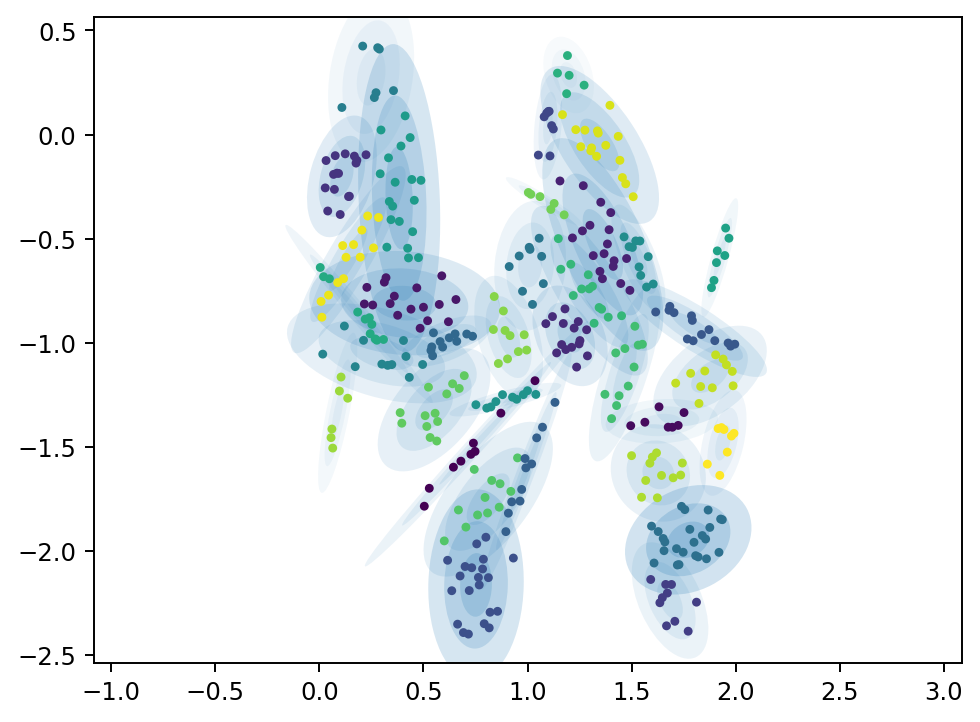

In [21]:
gmm = GaussianMixture(n_components=34, covariance_type='full', random_state=42).fit(X)
labels_gmm = gmm.predict(X)
plt.figure(dpi=175)
plot_gmm(gmm, X)

In [8]:
probabilities = gmm.predict_proba(X)
probabilities

array([[1.95478876e-09, 3.88274485e-58, 9.99471116e-01, 5.28881963e-04,
        2.43283138e-21],
       [8.38996987e-09, 3.70548751e-56, 9.98869956e-01, 1.13003574e-03,
        2.56964099e-22],
       [1.75996449e-08, 3.90914150e-55, 9.98517848e-01, 1.48213443e-03,
        9.52911019e-23],
       ...,
       [6.36718123e-17, 8.10833600e-01, 3.63482697e-21, 1.89166339e-01,
        6.04131533e-08],
       [4.45052720e-17, 9.60326611e-01, 4.38220525e-21, 3.96733851e-02,
        4.03151192e-09],
       [3.96871806e-17, 5.42332524e-01, 1.55543194e-21, 4.57667188e-01,
        2.87563036e-07]])

5)Complete RBF Model

In [24]:
import scipy.stats
train_data_number = 400
center_number = 30
learning_rate = 0.01

class RBF:
    def __init__(self, data_number, center_number, method, lr):
        self.data_number = data_number
        self.center_number = center_number
        self.lr = lr
        
        self.method = method
        self.b = np.random.random((1,1))
        self.w = np.random.random((self.center_number,1))
        
    def train(self, data_inp, data_out, epochs, flag=False):
        if (flag == False):
            if (self.method == "random"):
                self.centers = self.Randomly(data_inp)
            elif (self.method == "kmeans"):
                self.centers = self.K_means(data_inp, data_out)
            elif (self.method == "gmm"):
                self.centers = self.GMM(data_inp, data_out)
            
            max_dist = np.max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])
            l1 = max_dist / np.sqrt(2*self.center_number)
            self.rs = np.repeat(l1, self.center_number)
            self.rs = np.expand_dims(self.rs, axis=1)
            
        for e in range(epochs):
            for i in range(self.data_number):
                self.produce_output(data_inp[i], data_out[i])
        
    def Randomly(self, data):
        indexes = random.permutation(len(data))
        indexes = indexes[:self.center_number]
        centers = [data[i] for i in indexes]
        return np.array(centers)
    
    def K_means(self, data_inp, data_out):
        data = list(zip(data_inp, data_out))
        centers = KMeans(n_clusters=self.center_number).fit(data)
        centers = np.array([centers.cluster_centers_[i][0] for i in range(len(centers.cluster_centers_))])
        return centers

    def GMM(self, data_inp, data_out):
        data = list(zip(data_inp, data_out))
        gmm = GaussianMixture(n_components=self.center_number)
        gmm.fit(data)
        centers = []
        for i in range(gmm.n_components):
            covar = gmm.covariances_[i]
            mean = gmm.means_[i]
            status = scipy.stats.multivariate_normal(cov=covar, mean=mean)
            density = status.logpdf(data)
            centers.append(data_inp[np.argmax(density)])
        return np.array(centers)

    def predict(self, x):
        y = []
        for i in range(len(x)):
            y.append(self.produce_output(x[i], y_train=None))
        return np.array(y)
    
    def produce_output(self, data, y_train):
        self.centers = self.centers.reshape(self.center_number, 1)
        distance = -np.abs(data-self.centers)
        rbf_res = np.exp(distance/np.power(self.rs,2))
        output = np.dot(self.w.T, rbf_res) + self.b
        if (y_train is not None):
            error = output.reshape(1,1) - y_train.reshape(1,1)
            self.w = self.w - self.lr * rbf_res * error
            self.b = self.b - self.lr * error
        return output

6)Train K-Means

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


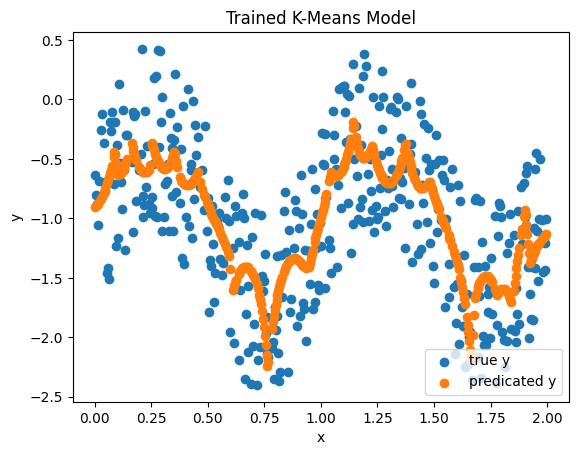

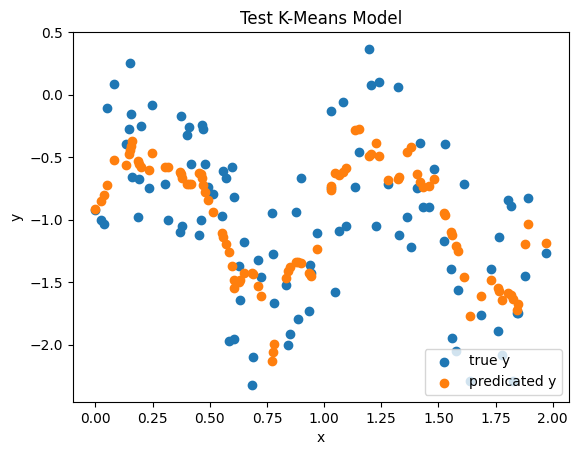

In [25]:
K_Means_Model = RBF(train_data_number, center_number, "kmeans", learning_rate)
K_Means_Model.train(x_train1, y_train1, 500)

K_Means_Model_Predict_Labels = K_Means_Model.predict(x_train1).reshape((-1,1))

plt.scatter(x_train1, y_train1)
plt.scatter(x_train1, K_Means_Model_Predict_Labels)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Trained K-Means Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

K_Means_Model_Predict = K_Means_Model.predict(x_test1).reshape((-1,1))

plt.scatter(x_test1, y_test1)
plt.scatter(x_test1, K_Means_Model_Predict)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Test K-Means Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

7)Train GM Model

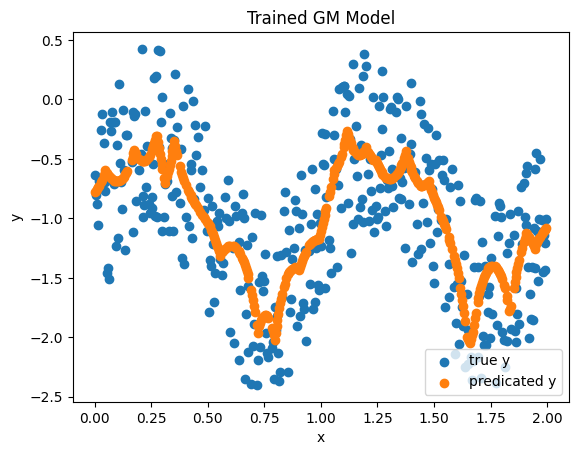

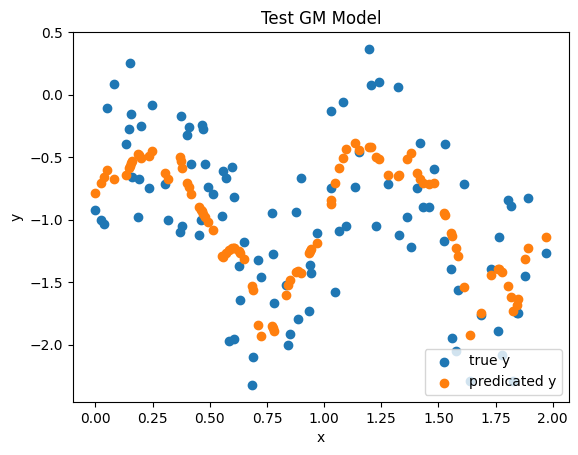

In [26]:
GM_Model = RBF(train_data_number, center_number, "gmm", learning_rate)
GM_Model.train(x_train1, y_train1, 500)


GM_Model_Predict_Labels = GM_Model.predict(x_train1).reshape((-1,1))

plt.scatter(x_train1, y_train1)
plt.scatter(x_train1, GM_Model_Predict_Labels)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Trained GM Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

GM_Model_Predict = GM_Model.predict(x_test1).reshape((-1,1))

plt.scatter(x_test1, y_test1)
plt.scatter(x_test1, GM_Model_Predict)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Test GM Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


7)Train Random Model

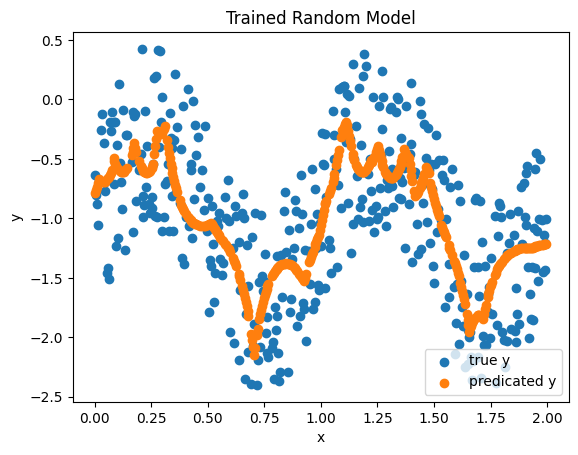

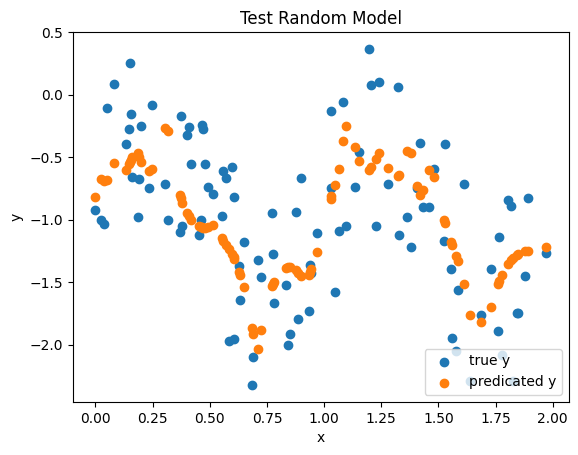

In [28]:
Random_Model = RBF(train_data_number, center_number, "random", learning_rate)
Random_Model.train(x_train1, y_train1, 500)


Random_Model_Predict_Labels = Random_Model.predict(x_train1).reshape((-1,1))

plt.scatter(x_train1, y_train1)
plt.scatter(x_train1, Random_Model_Predict_Labels)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Trained Random Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Random_Model_Predict = Random_Model.predict(x_test1).reshape((-1,1))

plt.scatter(x_test1, y_test1)
plt.scatter(x_test1, Random_Model_Predict)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Test Random Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

8)MLP

In [36]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

l0 = Input(shape=(1))

l1 = Dense(200)(l0)
l1 = Activation("relu")(l1)

l2 = Dense(100)(l1)
l2 = Activation("relu")(l2)

l3 = Dense(50)(l2)
l3 = Activation("relu")(l3)

l4 = Dense(1)(l3)

MLP = Model(inputs=l0, outputs=l4)
MLP.compile(loss='mean_squared_error', optimizer='SGD')
MLP.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_16 (Dense)            (None, 200)               400       
                                                                 
 activation_12 (Activation)  (None, 200)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
 activation_13 (Activation)  (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 activation_14 (Activation)  (None, 50)                0   

In [41]:
data = np.array(list(zip(x_test1, y_test1)))
MLP.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=800, batch_size=64)

Epoch 1/800
7/7 [==============================] - 0s 15ms/step - loss: 0.2256 - val_loss: 0.2170
Epoch 2/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2252 - val_loss: 0.2187
Epoch 3/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2231 - val_loss: 0.2181
Epoch 4/800
7/7 [==============================] - 0s 8ms/step - loss: 0.2245 - val_loss: 0.2238
Epoch 5/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2241 - val_loss: 0.2201
Epoch 6/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2238 - val_loss: 0.2272
Epoch 7/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2266 - val_loss: 0.2211
Epoch 8/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2246 - val_loss: 0.2192
Epoch 9/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2237 - val_loss: 0.2174
Epoch 10/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2242 - val_loss: 0.2384
Epoch 11/800
7/7 [=====

7/7 [==============================] - 0s 10ms/step - loss: 0.2249 - val_loss: 0.2168
Epoch 85/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2226 - val_loss: 0.2321
Epoch 86/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2254 - val_loss: 0.2217
Epoch 87/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2227 - val_loss: 0.2244
Epoch 88/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2233 - val_loss: 0.2230
Epoch 89/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2242 - val_loss: 0.2154
Epoch 90/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2236 - val_loss: 0.2417
Epoch 91/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2246 - val_loss: 0.2213
Epoch 92/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2234 - val_loss: 0.2170
Epoch 93/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2228 - val_loss: 0.2153
Epoch 94/800
7/7 [========

7/7 [==============================] - 0s 10ms/step - loss: 0.2204 - val_loss: 0.2253
Epoch 167/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2265 - val_loss: 0.2161
Epoch 168/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2233 - val_loss: 0.2259
Epoch 169/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2229 - val_loss: 0.2217
Epoch 170/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2226 - val_loss: 0.2170
Epoch 171/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2209 - val_loss: 0.2190
Epoch 172/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2234 - val_loss: 0.2243
Epoch 173/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2228 - val_loss: 0.2176
Epoch 174/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2219 - val_loss: 0.2181
Epoch 175/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2224 - val_loss: 0.2244
Epoch 176/800
7/7 [=

7/7 [==============================] - 0s 10ms/step - loss: 0.2221 - val_loss: 0.2273
Epoch 249/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2239 - val_loss: 0.2166
Epoch 250/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2191 - val_loss: 0.2143
Epoch 251/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2228 - val_loss: 0.2168
Epoch 252/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2200 - val_loss: 0.2171
Epoch 253/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2208 - val_loss: 0.2157
Epoch 254/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2202 - val_loss: 0.2142
Epoch 255/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2186 - val_loss: 0.2148
Epoch 256/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2199 - val_loss: 0.2157
Epoch 257/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2211 - val_loss: 0.2356
Epoch 258/800
7/7

7/7 [==============================] - 0s 10ms/step - loss: 0.2188 - val_loss: 0.2165
Epoch 331/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2213 - val_loss: 0.2164
Epoch 332/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2233 - val_loss: 0.2168
Epoch 333/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2190 - val_loss: 0.2221
Epoch 334/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2202 - val_loss: 0.2182
Epoch 335/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2177 - val_loss: 0.2125
Epoch 336/800
7/7 [==============================] - 0s 14ms/step - loss: 0.2184 - val_loss: 0.2183
Epoch 337/800
7/7 [==============================] - 0s 12ms/step - loss: 0.2172 - val_loss: 0.2345
Epoch 338/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2255 - val_loss: 0.2187
Epoch 339/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2185 - val_loss: 0.2187
Epoch 340/800
7/7

7/7 [==============================] - 0s 11ms/step - loss: 0.2172 - val_loss: 0.2336
Epoch 413/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2259 - val_loss: 0.2187
Epoch 414/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2163 - val_loss: 0.2436
Epoch 415/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2211 - val_loss: 0.2228
Epoch 416/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2190 - val_loss: 0.2145
Epoch 417/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2177 - val_loss: 0.2154
Epoch 418/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2181 - val_loss: 0.2193
Epoch 419/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2183 - val_loss: 0.2187
Epoch 420/800
7/7 [==============================] - 0s 12ms/step - loss: 0.2180 - val_loss: 0.2187
Epoch 421/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2160 - val_loss: 0.2132
Epoch 422/800
7

7/7 [==============================] - 0s 10ms/step - loss: 0.2199 - val_loss: 0.2148
Epoch 495/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2161 - val_loss: 0.2147
Epoch 496/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2174 - val_loss: 0.2136
Epoch 497/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2171 - val_loss: 0.2187
Epoch 498/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2165 - val_loss: 0.2198
Epoch 499/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2185 - val_loss: 0.2175
Epoch 500/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2162 - val_loss: 0.2134
Epoch 501/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2182 - val_loss: 0.2139
Epoch 502/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2187 - val_loss: 0.2251
Epoch 503/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2174 - val_loss: 0.2187
Epoch 504/800
7/

7/7 [==============================] - 0s 11ms/step - loss: 0.2153 - val_loss: 0.2183
Epoch 577/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2176 - val_loss: 0.2165
Epoch 578/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2182 - val_loss: 0.2209
Epoch 579/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2169 - val_loss: 0.2286
Epoch 580/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2159 - val_loss: 0.2200
Epoch 581/800
7/7 [==============================] - 0s 12ms/step - loss: 0.2184 - val_loss: 0.2304
Epoch 582/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2201 - val_loss: 0.2336
Epoch 583/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2213 - val_loss: 0.2223
Epoch 584/800
7/7 [==============================] - 0s 13ms/step - loss: 0.2183 - val_loss: 0.2285
Epoch 585/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2204 - val_loss: 0.2454
Epoch 586/800


7/7 [==============================] - 0s 9ms/step - loss: 0.2144 - val_loss: 0.2170
Epoch 659/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2154 - val_loss: 0.2230
Epoch 660/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2153 - val_loss: 0.2167
Epoch 661/800
7/7 [==============================] - 0s 8ms/step - loss: 0.2148 - val_loss: 0.2240
Epoch 662/800
7/7 [==============================] - 0s 8ms/step - loss: 0.2202 - val_loss: 0.2123
Epoch 663/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2143 - val_loss: 0.2180
Epoch 664/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2155 - val_loss: 0.2185
Epoch 665/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2154 - val_loss: 0.2176
Epoch 666/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2162 - val_loss: 0.2149
Epoch 667/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2153 - val_loss: 0.2223
Epoch 668/800
7/7 [=

7/7 [==============================] - 0s 9ms/step - loss: 0.2181 - val_loss: 0.2184
Epoch 741/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2144 - val_loss: 0.2306
Epoch 742/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2172 - val_loss: 0.2243
Epoch 743/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2170 - val_loss: 0.2120
Epoch 744/800
7/7 [==============================] - 0s 9ms/step - loss: 0.2175 - val_loss: 0.2185
Epoch 745/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2165 - val_loss: 0.2268
Epoch 746/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2171 - val_loss: 0.2213
Epoch 747/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2130 - val_loss: 0.2131
Epoch 748/800
7/7 [==============================] - 0s 10ms/step - loss: 0.2137 - val_loss: 0.2131
Epoch 749/800
7/7 [==============================] - 0s 11ms/step - loss: 0.2148 - val_loss: 0.2200
Epoch 750/800
7/7 [

13/13 [==============================] - 0s 2ms/step


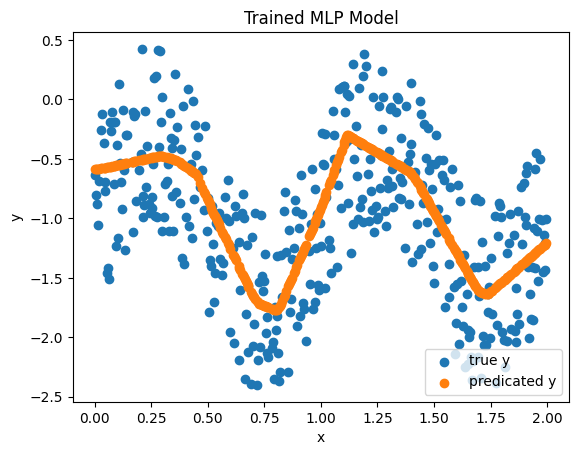

4/4 [==============================] - 0s 2ms/step


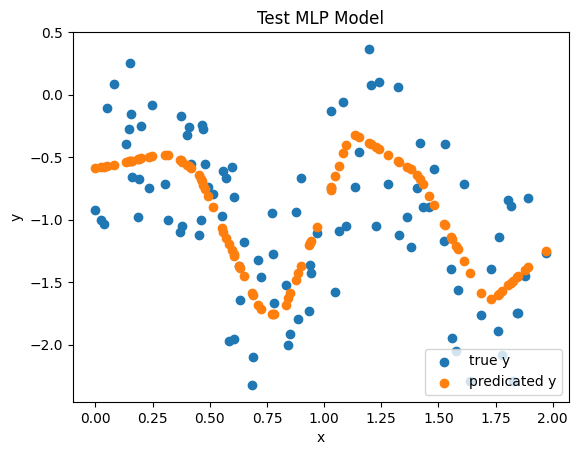

In [43]:
MLP_Model_Predict_Labels = MLP.predict(x_train1)

plt.scatter(x_train1, y_train1)
plt.scatter(x_train1, MLP_Model_Predict_Labels)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Trained MLP Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

MLP_Model_Predict = MLP.predict(x_test1)

plt.scatter(x_test1, y_test1)
plt.scatter(x_test1, MLP_Model_Predict)
plt.legend(["true y", "predicated y"], loc ="lower right")
plt.title("Test MLP Model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

9)Result

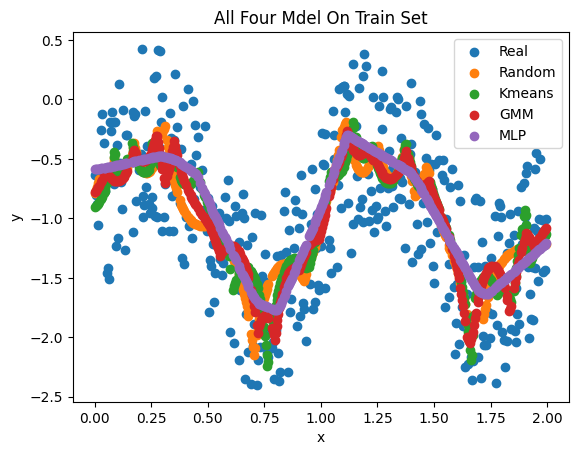

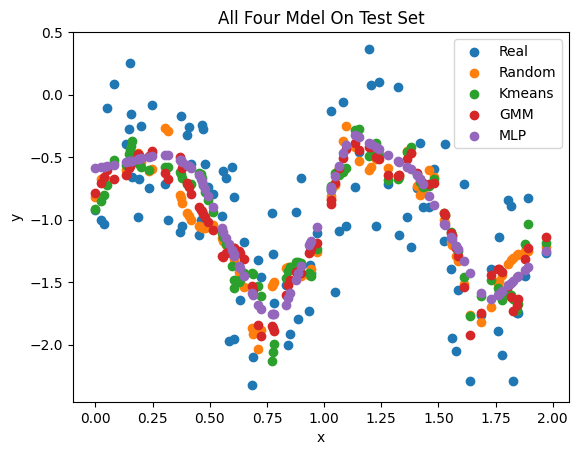

In [48]:
plt.scatter(x_train1, y_train1)
plt.scatter(x_train1, Random_Model_Predict_Labels)
plt.scatter(x_train1, K_Means_Model_Predict_Labels)
plt.scatter(x_train1, GM_Model_Predict_Labels)
plt.scatter(x_train1, MLP_Model_Predict_Labels)
plt.legend(["Real", "Random", "Kmeans", "GMM", "MLP"], loc ="upper right")
plt.title("All Four Mdel On Train Set")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.scatter(x_test1, y_test1)
plt.scatter(x_test1, Random_Model_Predict)
plt.scatter(x_test1, K_Means_Model_Predict)
plt.scatter(x_test1, GM_Model_Predict)
plt.scatter(x_test1, MLP_Model_Predict)
plt.legend(["Real", "Random", "Kmeans", "GMM", "MLP"], loc ="upper right")
plt.title("All Four Mdel On Test Set")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
